In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2018-01-04"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2018_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-01-04,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6675,해운대구,8067,해운대구,1392,20.85%,"7,389"
1,2018-01-04,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2018-01-04,달걀,오경슈퍼란60g정도 10개,2500,해운대구,2790,해운대구,290,11.6%,"2,657"
3,2018-01-04,대파,1.0㎏,3100,해운대구,3790,해운대구,690,22.26%,"3,388"
4,2018-01-04,돼지고기,삼겹살 500g,8400,해운대구,10950,해운대구,2550,30.36%,"9,417"
5,2018-01-04,두부,500g 판두부(국산포장두부 420g) 1모,4078,해운대구,4632,해운대구,554,13.59%,"4,358"
6,2018-01-04,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676
7,2018-01-04,맥주,하이트 500㎖ 1병,1400,해운대구,1410,해운대구,10,0.71%,"1,407"
8,2018-01-04,무,2.0㎏ 1개,1196,해운대구,2602,해운대구,1406,117.56%,"2,085"
9,2018-01-04,밀가루,백설표 중력분1등2.5㎏,3080,해운대구,4112,해운대구,1032,33.51%,"3,569"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2018-04-05"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2018_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-04-05,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6445,해운대구,8175,해운대구,1730,26.84%,"7,348"
1,2018-04-05,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2018-04-05,달걀,오경슈퍼란60g정도 10개,1750,해운대구,2680,해운대구,930,53.14%,"2,240"
3,2018-04-05,닭고기,육계 1.0㎏,4666,해운대구,7237,해운대구,2571,55.1%,"5,794"
4,2018-04-05,대파,1.0㎏,2484,해운대구,2990,해운대구,506,20.37%,"2,691"
5,2018-04-05,돼지고기,삼겹살 500g,7900,해운대구,13950,해운대구,6050,76.58%,"10,250"
6,2018-04-05,두부,500g 판두부(국산포장두부 420g) 1모,4078,해운대구,4632,해운대구,554,13.59%,"4,358"
7,2018-04-05,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676
8,2018-04-05,맥주,하이트 500㎖ 1병,1400,해운대구,1410,해운대구,10,0.71%,"1,407"
9,2018-04-05,무,2.0㎏ 1개,2087,해운대구,4438,해운대구,2351,112.65%,"3,451"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2018-07-05"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2018_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-07-05,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,해운대구,8067,해운대구,642,8.65%,"7,639"
1,2018-07-05,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2018-07-05,달걀,오경슈퍼란60g정도 10개,2000,해운대구,2680,해운대구,680,34.0%,"2,357"
3,2018-07-05,닭고기,육계 1.0㎏,4600,해운대구,6237,해운대구,1637,35.59%,"5,335"
4,2018-07-05,대파,1.0㎏,2456,해운대구,2992,해운대구,536,21.82%,"2,661"
5,2018-07-05,돼지고기,삼겹살 500g,10400,해운대구,16450,해운대구,6050,58.17%,"12,750"
6,2018-07-05,두부,500g 판두부(국산포장두부 420g) 1모,4078,해운대구,4632,해운대구,554,13.59%,"4,358"
7,2018-07-05,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676
8,2018-07-05,맥주,하이트 500㎖ 1병,1400,해운대구,1410,해운대구,10,0.71%,"1,407"
9,2018-07-05,무,2.0㎏ 1개,1780,해운대구,3316,해운대구,1536,86.29%,"2,354"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2018-10-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2018_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-10-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5925,해운대구,8067,해운대구,2142,36.15%,"7,139"
1,2018-10-11,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2018-10-11,고등어,30㎝정도 500g 1마리,2741,해운대구,3417,해운대구,676,24.66%,"2,969"
3,2018-10-11,달걀,오경슈퍼란60g정도 10개,2480,해운대구,2690,해운대구,210,8.47%,"2,583"
4,2018-10-11,닭고기,육계 1.0㎏,4666,해운대구,8112,해운대구,3446,73.85%,"6,159"
5,2018-10-11,대파,1.0㎏,5000,해운대구,6097,해운대구,1097,21.94%,"5,440"
6,2018-10-11,돼지고기,삼겹살 500g,9000,해운대구,14950,해운대구,5950,66.11%,"11,283"
7,2018-10-11,두부,500g 판두부(국산포장두부 420g) 1모,4188,해운대구,4632,해운대구,444,10.6%,"4,395"
8,2018-10-11,라면,신라면 120g 1봉지,656,해운대구,676,해운대구,20,3.05%,669
9,2018-10-11,맥주,하이트 500㎖ 1병,1400,해운대구,1410,해운대구,10,0.71%,"1,407"


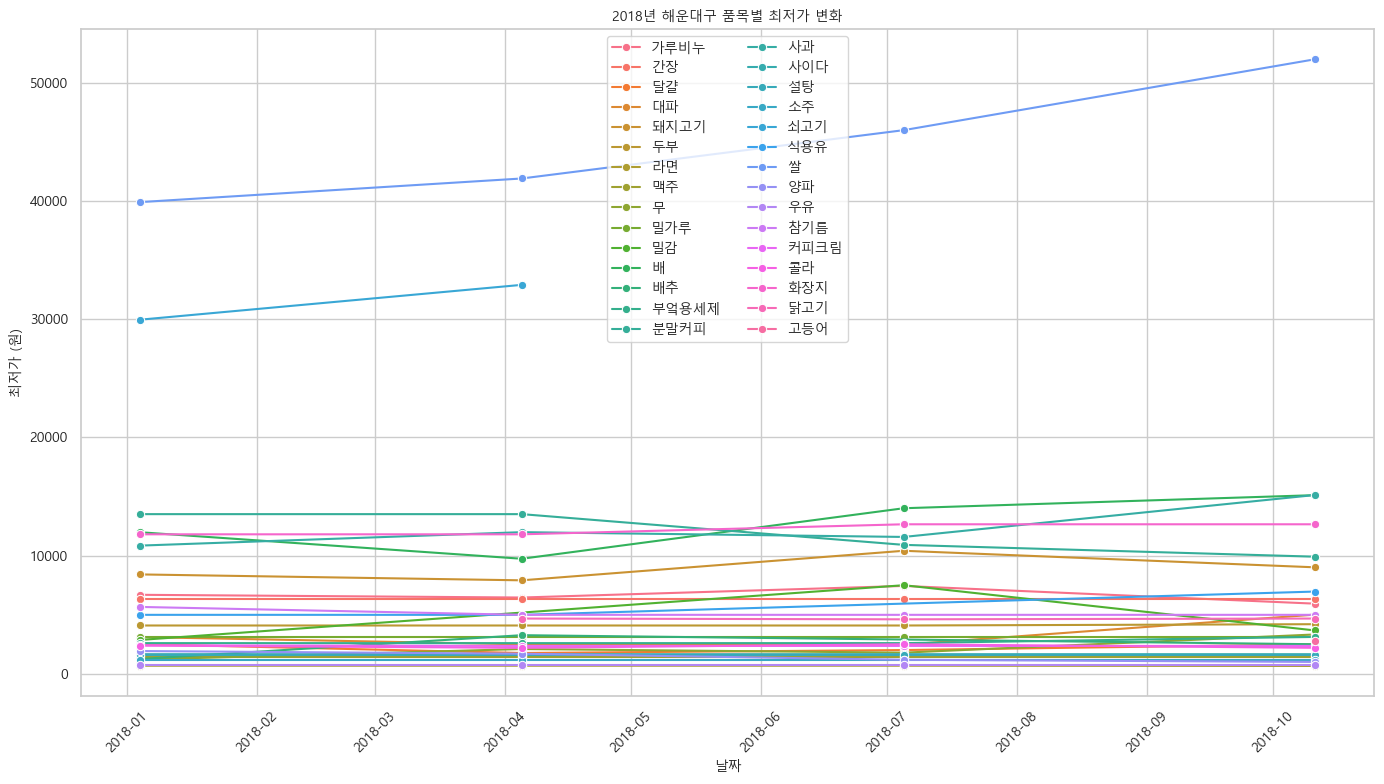

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2018_1q.csv")
q2 = pd.read_csv("해운대구2018_2q.csv")
q3 = pd.read_csv("해운대구2018_3q.csv")
q4 = pd.read_csv("해운대구2018_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2018년 해운대구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("해운대구2018_min.csv", index=False, encoding="utf-8-sig")

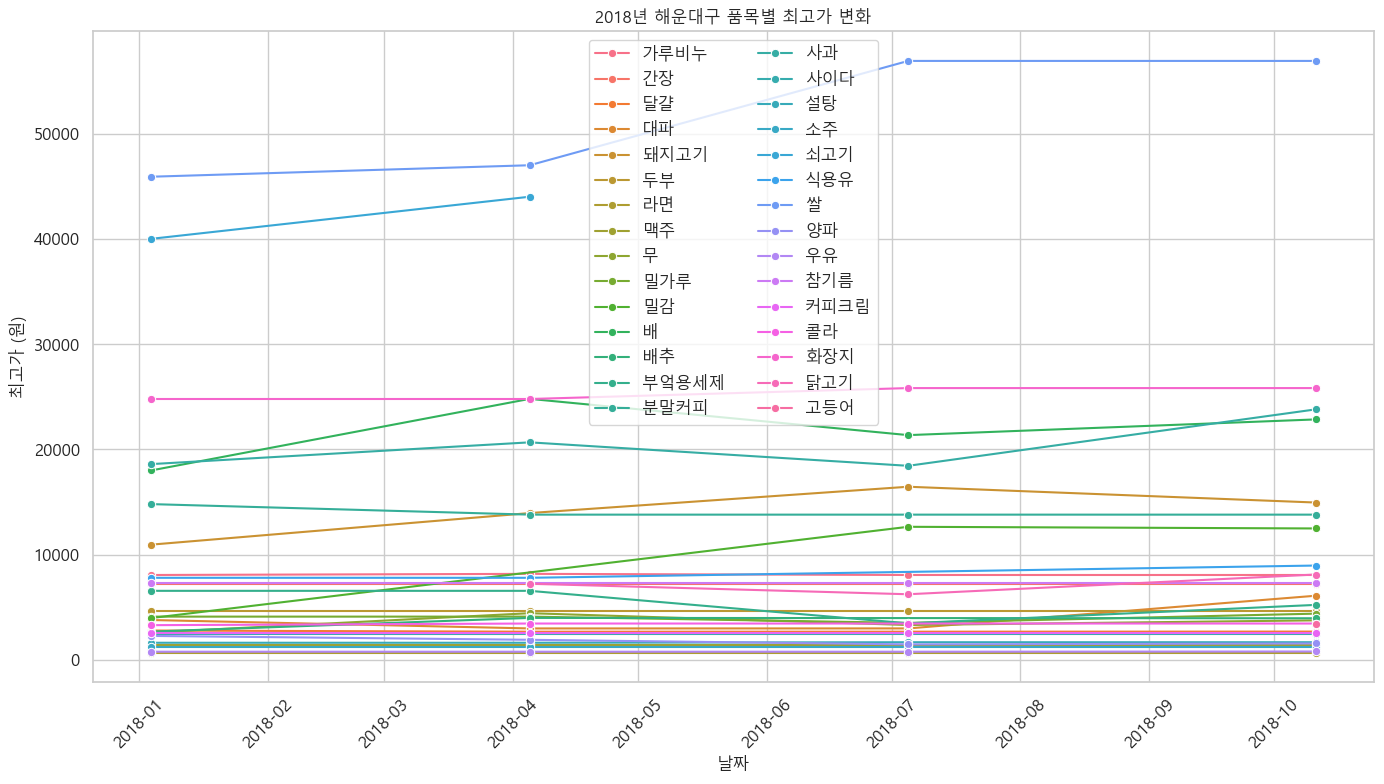

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2018_1q.csv")
q2 = pd.read_csv("해운대구2018_2q.csv")
q3 = pd.read_csv("해운대구2018_3q.csv")
q4 = pd.read_csv("해운대구2018_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2018년 해운대구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("해운대구2018_max.csv", index=False, encoding="utf-8-sig")